# Importing Libraries

In [1]:
import pandas as pd
import json
from pandas.io.json import json_normalize
from datetime import datetime
import time
import io
import requests
from pytz import timezone
from gpx_converter import Converter
from datetime import timedelta
from datetime import datetime, timezone

# GPX to CSV

In [2]:
def gpx_csv(gpx_file, csv_file):
    Converter(input_file=gpx_file).gpx_to_csv(output_file=csv_file)
    df = pd.read_csv(csv_file, parse_dates = ['time'])
    df['time'] = df['time'].apply(remove_timezone)
    
    df['created_at'] = df['time'] + timedelta(hours = 5, minutes=30)
    df = df[list(('time','created_at', 'latitude', 'longitude','altitude'))]
    return df.to_csv(csv_file,index = False)


# Node details

In [3]:
# Node Details
def Node_details(Node):
    
    A = {'AQ12':["1259399" ,"CFWUWQX8V0KKENP8","Muthuyala House Masjid Banda" ],
         'AQ13':["1259400","YY7L4JS4ALW57EAK", "Botanical Garden Turtle Building"],
         'AQ14':["1259401","64QY0FW1L0BPW5EO" ,"UOH Small Gate"],
         'AQ15':["1259402","99TUCQZE972MXGZU", "Decathlon"],
         'AQ16':["1259404","JGU270DVZSY9UGLU", "Indira Nagar"],
         'AQ17':["1259405","HAZNZETVYWLD4WG5", "Botanical Garden- Foundation Rock"],
         'AQ18':["1259407","PE52UR05LMMGPZ63", "Wipro"], 
         'AQ19':["1259409","6BNFTYKVP94I2K0T","Godrej"], 
         'AQ20':["1259410","XZKX6FDL27F5OPSE","Botanical Garden- Near Water Sump"],
         'AQ21':["1259412","HIUPEPXA2GONWMCW","Max Telecom Nagar"],
         'AQ22':["1268490","BFDU3O0WF2N5GHNL","UOH"],
         'AQ23':["1268492","EEKPJATLWL59XNN2","Biodiversity"],
         'AQ24':["1268493","MEQ8EDMKB1DF4DJ2","AQ24_Node"],
         'AQ25':["1268494","RS1D4PX6IMU3JKZA","AQ25_Node"], 
         'AQ26':["1268496","HG78V9V1YL93Y3KQ","AQ26_Node"],
         'AQ27':["1268491","MRPT672AKF01K0R9","Mobile Node-1"], 
         'AQ28':["1281469","H0SEEFMQ9J7PJSEF", "Mobile Node-2"], 
         'AQ29':["1281473","MU50IXOZGG7CJRT5","Mobile Node-3"],
         'AQ30':["1290819","7FWF8YX5G4TVJ4FN","EPTRI"],
         'AQ31':["1290821","RMFJAXSNSBBRYO04","Apollo Pharmacy"], 
         'AQ32':["1290822","2K4M84VY3E6RGVQK","Gachibowli Flyover"],
         'AQ33':["1290823","EH9X64OO1C89JQNE","Street 19"],
         'AQ34':["1290824","R87BTUHJRJWX84DJ","KV Gachibowli"], 
         'AQ35':["1290825","6ZPOMR96B9KPFNS9","Jayadarshini Residency"],
         'AQ36':["1310976","X39J635KA55IM5V6","RTTC"], 
         'AQ37':["1310978","PBS8D6AWEQ7DISDH","ISB"], 
         'AQ38':["1310979","EYSPDIX3X017GVXQ","Botanical Garden- Near Washroom"],
         'AQ39':["1310980","O3SFRELJP5NLDURK","Prime Splendor"], 
         'AQ40':["1310981","5JWYWU5QR9N4VN94","IIIT Junction"],
         'AQ41':["1310982","F8JV9O1T3HNEMYLN","Masjid Banda Circle"],
         'AQ42':["1310983","PJ6M2QNOH4WDYIAH","Vijaya Diagnostics"], 
         'AQ43':["1310984","92WJ4GLX4RQEYITC","Botanical Garden"],
         'AQ44':["1310985","JUWBW40NPXJQKSZS","PSR Talent Sprint"],
         'AQ45':["1310986","28WDGFIT489PGJVA","Bramha Kumari -1"],
         'AQ46':["1408872","XE4Z9EWAFKP9M8C3","Bramha Kumari-2"], 
         'AQ47':["1408874","OQLOTELOT3GWN4HU","Skyla"],
         'AQ48':["1408875","18NBTV4RTF7BT6L0","AQ48_Node"],
         'AQ49':["1408876","WXVBHLW69H00NVB6","Arca Sarovar"],
         'AQ50':["1408883","OL46VIURR096RST8","Behind AIG"], 
         'AQ51':["1521813" ,"SRTFIQV999YA6BRX","AQ51_Node"],
         'Gases':["1291366","7EBE8K6NO7I360SI","Gases Node"]}


    channel = A[Node][0]
    api_key = A[Node][1]
    node_name = A[Node][2]
    return channel, api_key, node_name

# Downloading data from Thingspeak

In [4]:

# Downloading data from Thingspeak
def ThingSpeak_Download(Node,start_date, start_time,end_date, end_time, filename,verbose = False):
    '''
    All the Inputs must br give in string format
    
    Node :  NODE NUMBER
    start_date and end_date are in the format "yyyy:mm:dd"
    start_time and end_time are in the format "HH:MM:SS"
    filename : .csv format eg: trial.csv
    
    '''
    start_date = start_date
    end_date = end_date   
    start_time = start_time
    end_time = end_time
    file_name = filename
    
    continent= "Asia"  
    city = "Kolkata"
    channel, api_key, node_name = Node_details(Node)
    
    url = "https://api.thingspeak.com/channels/" + channel + "/feeds.csv?api_key=" +api_key +"&start=" +start_date +"%20" +start_time + "&end=" +end_date +"%20"+ end_time +"&timezone="+continent+"%2F"+city
    s=requests.get(url).content
    c=pd.read_csv(io.StringIO(s.decode('utf-8')))
    a = c
    x = c['created_at'].iloc[0].split(' ')[0]
    y = c['created_at'].iloc[0].split(' ')[1]


    while len(a) == 8000 and (x != start_date and y != start_time):
        #if x != start_date and y != start_time :
            end_date = x 
            end_time = y
            url = "https://api.thingspeak.com/channels/" + channel + "/feeds.csv?api_key=" +api_key +"&start=" +start_date +"%20" +start_time + "&end=" +end_date +"%20"+ end_time +"&timezone="+continent+"%2F"+city
            s=requests.get(url).content
            a = pd.read_csv(io.StringIO(s.decode('utf-8')))
            c = a.merge(c, how = 'outer')
            x = c['created_at'].iloc[0].split(' ')[0]
            
            y = c['created_at'].iloc[0].split(' ')[1]
            
            if verbose == True:
                print(len(a))
                print(x)
                print(y)
            
    return c.to_csv(filename, index = False)

# Megasense : (Json to CSV Conversion)

In [5]:
def File_conversion(input_file, output_file):
    data = [json.loads(line) for line in open(input_file, 'r')]
    df1 = json_normalize(data)
    t= []
    epoch_time = df1['data.timestamp'].astype(int)
    time_formatted = epoch_time.apply(lambda t: time.strftime('%Y-%m-%d %H:%M:%S', time.localtime(t/1000.0)))
    df1 = df1.drop(columns = {'receivedTimestamp', 'key'})
    df1.insert(0, 'Date Time',time_formatted)
    df1.tail()
    return df1.to_csv(output_file,index = False)

# Merging files

In [56]:

# FUNCTION TO REMOVE TIMEZONE
def remove_timezone(dt):
   
    # HERE `dt` is a python datetime
    # object that used .replace() method
    return dt.replace(tzinfo=None)

def Merged_file(df1, aero, filename,node_type):
    
    df1['created_at'] = df1['created_at'].apply(remove_timezone)
    df1.set_index("created_at", inplace = True)
    DF1 = df1.resample('T', label='right', closed='right').mean().round(3)
    DF1 = DF1.dropna(axis=1, how='all')
    DF1 = DF1.drop(['entry_id'], axis = 1)
    
    aero = aero.rename(columns={"Date Time": "created_at"})
    
    if node_type == 'PM':
        
        DF1 = DF1.rename(columns = {'field1': 'pm10','field2': 'pm2.5', 'field3': 'RH', 'field4': 'Temperature'})
        #aero['PM10_ppm'] = aero[' PM10(ppm)']*1000
        #aero['PM2.5_ppm'] = aero[' PM2.5(ppm)']*1000
    elif node_type == 'Gases':
        DF1 = DF1.rename(columns = {'field1': 'CO_1','field2': 'SO2_1', 'field3': 'CO_2', 'field4': 'SO2_2',
                                    'field5': 'Temperature', 'field6': 'RH', 'field7': 'Pressure'})
    elif node_type == 'Megasense':
        DF1 = DF1.drop(columns = {'Unnamed: 0','data.eq_db','data.onesmin_db','data.onesmax_db','data.x_g',
         'data.y_g','data.z_g','data.x_raw','data.y_raw','data.z_raw','data.lux_lx','data.uv_mwpm2','data.nc0p5_npcm3',
         'data.nc1p0_npcm3','data.nc2p5_npcm3','data.nc4p0_npcm3','data.nc10p0_npcm3','data.mc1p0_ugpm3',
         'data.mc2p5_ugpm3','data.mc4p0_ugpm3','data.mc10p0_ugpm3','data.typ_pm_um','data.batt_volt','data.bme280_int',
         'data.speco3_int','data.mic_int','data.mic4514_int','data.mic4514pre_int','data.sgpc3_int','data.sps30_int',
         'data.sps30pre_int','data.lis3dh_int','data.si1133_int','data.batt_int','data.leds_on','data.code_version',
         'data.gps_avg_snr','data.cell_strength_dbm','data.wifi_strength_dbm','data.wifi_strength_asl'}, axis=  1)
        DF1 = DF1.rename(columns = {'data.timestamp': 'created_at'})

    O1 = pd.merge(aero,DF1,on = 'created_at', how = 'inner').dropna()
    if len(O1)> 0:
        print(len(O1))
    else: print('NO DATA')
    return O1.to_csv(filename,index = False)

    
# GPS Merge
def gps_merge(file, gps_file):
    df = pd.merge(file, gps_file, on = 'created_at', how = 'inner')
    return df

In [57]:
def complete_process(aero, device,GPS):
    if device == 'IIIT':
        Node = input('Enter the Node(AQ/Gases): ')
        start_date = input('Enter the start date(yyyy-mm-dd): ')
        start_time = input('Enter start time(HH:MM:SS): ')
        end_date = input('Enter the end date(yyyy-mm-dd): ')
        end_time = input('Enter end time(HH:MM:SS): ')
        filename = input('Enter the name of the output CSV file(.csv): ')
        ThingSpeak_Download(Node,start_date, start_time,end_date, end_time, filename,verbose = False)
        df1 = pd.read_csv(filename, parse_dates = ['created_at'])
        node_type = input('Enter the Node Type(PM/Gases): ')
      
    elif device == 'Megasense':
        input_file = input('Enter the name of Json file(.json): ')
        output_file = input('Enter the name of ouput CSV file(.csv): ')
        df1 = File_conversion(input_file, output_file)
        node_type = 'Megasense'
    filename = input('Merged file name(.csv): ')
    aero_merge = Merged_file(df1, aero, filename,node_type)
    
    if GPS == True:
        gpx_file = input('Enter the gpx file name(.gpx): ')
        csv_file = input('gpx to csv converted file(.csv): ')
        gpx_csv(gpx_file, csv_file)
        gps_file = pd.read_csv(csv_file, parse_dates = ['created_at'])
        file_name = input('File to merge with gps data(.csv): ')
        file = pd.read_csv(file_name, parse_dates = ['created_at'])
        gps_merged_file = gps_merge(file, gps_file)
        final_file = gps_merged_file
    else:
        final_file = aero_merge
    output_file  = input('Save the file as(csv): ')
    return final_file.to_csv(output_file, index = False)
        

In [ ]:
aero = pd.read_csv('Aeroqual_data//aeroqual_021121.csv', parse_dates = ['Date Time'])
a = complete_process(aero, device= 'IIIT',GPS = True)



In [51]:
a = pd.read_csv('GPS_Aero&AQ24_6nov.csv')
len(a)

192

In [12]:
df = ThingSpeak_Download('Gases','2021-11-02','09:00:00',"2021-11-02", '18:00:00', 'Ytrial.csv',verbose = False)

In [22]:
df = gpx_csv("20211102-115330.gpx", '2nov_route.csv')

In [23]:
df

,time,created_at,latitude,longitude,altitude
0,2021-11-02 06:23:30,2021-11-02 11:53:30,17.451515,78.363593,519.821
1,2021-11-02 06:23:31,2021-11-02 11:53:31,17.451578,78.363586,518.347
2,2021-11-02 06:23:32,2021-11-02 11:53:32,17.451645,78.363578,518.145
3,2021-11-02 06:23:33,2021-11-02 11:53:33,17.451705,78.363567,518.212
4,2021-11-02 06:23:34,2021-11-02 11:53:34,17.451771,78.363554,518.596
...,...,...,...,...,...
15659,2021-11-02 12:28:13,2021-11-02 17:58:13,17.444856,78.350140,514.367
15660,2021-11-02 12:28:14,2021-11-02 17:58:14,17.444857,78.350139,513.881
15661,2021-11-02 12:28:15,2021-11-02 17:58:15,17.444858,78.350141,512.878
15662,2021-11-02 12:28:16,2021-11-02 17:58:16,17.444858,78.350142,512.558


In [3]:


    start_date = "2021-10-23"
    end_date = "2021-10-23"   
    start_time = "11:00:00"
    end_time = "18:30:00"
    
    
    continent= "Asia"  
    city = "Kolkata"
    channel =  "1291366"
    api_key = "7EBE8K6NO7I360SI"
    
    url = "https://api.thingspeak.com/channels/" + channel + "/feeds.csv?api_key=" +api_key +"&start=" +start_date +"%20" +start_time + "&end=" +end_date +"%20"+ end_time +"&timezone="+continent+"%2F"+city
    s=requests.get(url).content
    c=pd.read_csv(io.StringIO(s.decode('utf-8')))
    c.to_csv('gases_23oct_mobile.csv', index = False)

In [6]:
df1 = pd.read_csv('gases_23oct_mobile.csv', parse_dates = ['created_at'])
aero = pd.read_csv('Aeroqual_data//aeroqual_231021_SO2.csv', parse_dates = ['Date Time'])


In [12]:
df1

,created_at,entry_id,field1,field2,field3,field4,field5,field6,field7
0,2021-10-23 11:43:53+05:30,517673,0,0,9,21,29.84,38.07617,946.50330
1,2021-10-23 11:43:56+05:30,517674,0,0,8,21,29.89,38.09082,946.59094
2,2021-10-23 11:44:00+05:30,517675,0,0,8,22,29.90,38.11230,946.59741
3,2021-10-23 11:44:03+05:30,517676,0,0,8,21,29.91,38.11328,946.57080
4,2021-10-23 11:44:06+05:30,517677,0,0,9,22,29.92,38.10254,946.59546
...,...,...,...,...,...,...,...,...,...
5192,2021-10-23 16:30:42+05:30,522865,0,0,6,34,32.73,34.35449,943.76776
5193,2021-10-23 16:30:45+05:30,522866,0,0,7,33,32.75,34.36621,943.79584
5194,2021-10-23 16:30:49+05:30,522867,0,0,6,34,32.73,34.30273,943.81268
5195,2021-10-23 16:30:52+05:30,522868,0,0,6,34,32.72,34.38379,943.80634


In [13]:
from datetime import datetime, timezone
# FUNCTION TO REMOVE TIMEZONE
def remove_timezone(dt):
   
    # HERE `dt` is a python datetime
    # object that used .replace() method
    return dt.replace(tzinfo=None)
df1['created_at'] = df1['created_at'].apply(remove_timezone)
df1.set_index("created_at", inplace = True)
DF1 = df1.resample('T', label='right', closed='right').mean().round(3)
DF1 = DF1.dropna(axis=1, how='all')
DF1 = DF1.drop(['entry_id'], axis = 1)
DF1 = DF1.rename(columns = {'field1': 'NO2','field2': 'O3', 'field3': 'CO', 'field4': 'SO2','field5': 'Temperature','field6': 'RH', 'field7': 'Pressure'})
aero = aero.rename(columns={"Date Time": "created_at"})

In [14]:
len(DF1)

288

In [26]:
aero

,created_at,Monitor ID,Location ID,SO2(ppm)
0,2021-10-23 11:32:00,1,1,0.0
1,2021-10-23 11:33:00,1,1,0.1
2,2021-10-23 11:34:00,1,1,0.0
3,2021-10-23 11:35:00,1,1,0.1
4,2021-10-23 11:36:00,1,1,0.1
...,...,...,...,...
296,2021-10-23 16:28:00,1,1,0.1
297,2021-10-23 16:29:00,1,1,0.1
298,2021-10-23 16:35:00,1,1,0.1
299,2021-10-23 16:36:00,1,1,0.1


In [16]:
DF1.tail(100)

,NO2,O3,CO,SO2,Temperature,RH,Pressure
created_at,,,,,,,
2021-10-23 14:52:00,0.0,0.0,17.632,71.684,36.772,27.313,952.252
2021-10-23 14:53:00,0.0,0.0,18.000,71.632,36.626,27.512,952.053
2021-10-23 14:54:00,0.0,0.0,17.316,70.579,36.503,28.220,952.250
2021-10-23 14:55:00,0.0,0.0,17.611,71.500,36.512,28.547,951.987
2021-10-23 14:56:00,0.0,0.0,16.944,73.500,36.497,28.567,951.773
...,...,...,...,...,...,...,...
2021-10-23 16:27:00,0.0,0.0,9.611,46.500,32.787,35.075,943.928
2021-10-23 16:28:00,0.0,0.0,9.211,42.158,32.787,35.482,943.992
2021-10-23 16:29:00,0.0,0.0,7.722,37.833,32.802,35.875,943.920


In [17]:
print(aero.dtypes)
print(DF1.dtypes)

created_at      datetime64[ns]
 Monitor ID              int64
 Location ID             int64
 SO2(ppm)              float64
dtype: object
NO2            float64
O3             float64
CO             float64
SO2            float64
Temperature    float64
RH             float64
Pressure       float64
dtype: object


In [18]:
O1 = pd.merge(aero,DF1, on = 'created_at', how = 'inner')
O1 =O1.dropna()


In [19]:
len(O1)

283

In [20]:
O1.to_csv('Mobile_SO2_gases_23oct.csv')

In [21]:
File_conversion('Device61_23oct.json', 'Device61_23oct.csv')
File_conversion('Device76_23oct.json', 'Device76_23oct.csv')
File_conversion('DeviceC5_23oct.json', 'DeviceC5_23oct.csv')

<ipython-input-2-1c2713b504e8>:3: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  df1 = json_normalize(data)


In [72]:
R1 = pd.read_csv('Device61_23oct.csv', parse_dates=['Date Time'])
R2 = pd.read_csv('Device76_23oct.csv', parse_dates=['Date Time'])
R3 = pd.read_csv('DeviceC5_23oct.csv', parse_dates=['Date Time'])

In [79]:
#R1['Date Time'] = df1['Date Time'].apply(remove_timezone)
R3.set_index("Date Time", inplace = True)
R3= R3.resample('T', label='right', closed='right').mean().round(3)
R3

,Unnamed: 0,data.temp_c,data.hum_prcnt,data.press_hpa,data.eq_db,data.onesmin_db,data.onesmax_db,data.co_ppm,data.no2_ppb,data.co_mv,...,data.leds_on,data.code_version,data.gps_avg_snr,data.cell_strength_dbm,data.wifi_strength_dbm,data.wifi_strength_asl,data.location.lat,data.location.lon,data.location.acc,data.timestamp
Date Time,,,,,,,,,,,,,,,,,,,,,
2021-06-16 10:19:00,0.0,31.27,57.546,947.396,40.023,39.456,43.117,406.0,2325.0,1632.0,...,1.0,1.0,0.000,-106.0,-74.0,2.0,23.186,77.415,45.60,1.623819e+12
2021-06-16 10:20:00,1.5,31.51,58.616,947.350,46.488,39.734,59.784,415.0,2301.5,1662.0,...,1.0,1.0,0.000,-109.5,-74.0,1.5,23.186,77.415,42.25,1.623819e+12
2021-06-16 10:21:00,3.5,31.99,57.434,947.373,44.219,36.809,61.297,414.0,2322.5,1662.5,...,1.0,1.0,0.000,-105.5,-86.5,1.0,23.186,77.415,58.65,1.623819e+12
2021-06-16 10:22:00,5.0,32.37,55.054,947.439,40.163,38.301,51.188,416.0,2317.0,1660.0,...,1.0,1.0,0.000,-106.0,-82.0,1.0,23.186,77.415,72.90,1.623819e+12
2021-06-16 10:23:00,6.5,32.42,54.740,947.437,40.750,38.934,42.946,413.5,2308.5,1661.5,...,1.0,1.0,0.000,-105.5,-82.0,1.0,23.186,77.415,70.85,1.623819e+12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-10-23 16:25:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-10-23 16:26:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-10-23 16:27:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [80]:
list(R3)

['Unnamed: 0',
 'data.temp_c',
 'data.hum_prcnt',
 'data.press_hpa',
 'data.eq_db',
 'data.onesmin_db',
 'data.onesmax_db',
 'data.co_ppm',
 'data.no2_ppb',
 'data.co_mv',
 'data.no2_mv',
 'data.x_g',
 'data.y_g',
 'data.z_g',
 'data.x_raw',
 'data.y_raw',
 'data.z_raw',
 'data.lux_lx',
 'data.uv_mwpm2',
 'data.nc0p5_npcm3',
 'data.nc1p0_npcm3',
 'data.nc2p5_npcm3',
 'data.nc4p0_npcm3',
 'data.nc10p0_npcm3',
 'data.mc1p0_ugpm3',
 'data.mc2p5_ugpm3',
 'data.mc4p0_ugpm3',
 'data.mc10p0_ugpm3',
 'data.typ_pm_um',
 'data.ozone_ppm',
 'data.ozone_volt_mv',
 'data.tvoc_ppb',
 'data.batt_prcnt',
 'data.batt_volt',
 'data.bme280_int',
 'data.speco3_int',
 'data.mic_int',
 'data.mic4514_int',
 'data.mic4514pre_int',
 'data.sgpc3_int',
 'data.sps30_int',
 'data.sps30pre_int',
 'data.lis3dh_int',
 'data.si1133_int',
 'data.batt_int',
 'data.leds_on',
 'data.code_version',
 'data.gps_avg_snr',
 'data.cell_strength_dbm',
 'data.wifi_strength_dbm',
 'data.wifi_strength_asl',
 'data.location.lat',
 '

In [81]:
R3 = R3.drop(columns = {'Unnamed: 0','data.eq_db','data.onesmin_db','data.onesmax_db','data.x_g',
 'data.y_g',
 'data.z_g',
 'data.x_raw',
 'data.y_raw',
 'data.z_raw',
 'data.lux_lx',
 'data.uv_mwpm2',
 'data.nc0p5_npcm3',
 'data.nc1p0_npcm3',
 'data.nc2p5_npcm3',
 'data.nc4p0_npcm3',
 'data.nc10p0_npcm3',
 'data.mc1p0_ugpm3',
 'data.mc2p5_ugpm3',
 'data.mc4p0_ugpm3',
 'data.mc10p0_ugpm3',
 'data.typ_pm_um','data.batt_volt',
 'data.bme280_int',
 'data.speco3_int',
 'data.mic_int',
 'data.mic4514_int',
 'data.mic4514pre_int',
 'data.sgpc3_int',
 'data.sps30_int',
 'data.sps30pre_int',
 'data.lis3dh_int',
 'data.si1133_int',
 'data.batt_int',
 'data.leds_on',
 'data.code_version',
 'data.gps_avg_snr',
 'data.cell_strength_dbm',
 'data.wifi_strength_dbm',
 'data.wifi_strength_asl'}, axis=  1)

In [82]:
list(R3)

['data.temp_c',
 'data.hum_prcnt',
 'data.press_hpa',
 'data.co_ppm',
 'data.no2_ppb',
 'data.co_mv',
 'data.no2_mv',
 'data.ozone_ppm',
 'data.ozone_volt_mv',
 'data.tvoc_ppb',
 'data.batt_prcnt',
 'data.location.lat',
 'data.location.lon',
 'data.location.acc',
 'data.timestamp']

In [83]:
#M1 = pd.merge(aero,R1, on = 'Date Time', how = 'inner')
#M2 = pd.merge(aero,R2, on = 'Date Time', how = 'inner')
M3 = pd.merge(aero,R3, on = 'Date Time', how = 'inner')
#M1 = M1[M1['data.temp_c'].notna()]
#M2 = M2[M2['data.temp_c'].notna()]
M3 = M3[M3['data.temp_c'].notna()]

#M1 =M1.dropna()
#M2 =M2.dropna()
M3 =M3.dropna()

print(len(M1))
print(len(M2))
print(len(M3))

141
247
77


In [84]:
M3.to_csv('DeviceC5&Aeroqual_23oct.csv')

In [87]:
r = pd.merge(M1, M2, on = 'Date Time', how = 'inner')
r2 = pd.merge(r, M3, on = 'Date Time', how = 'inner')

In [88]:
#res3 = res3[res3['data.temp_c'].notna()]
len(r2)


36

In [47]:
res3

,Date Time,Monitor ID,Location ID,SO2(ppm),Unnamed: 0,data.temp_c,data.hum_prcnt,data.press_hpa,data.eq_db,data.onesmin_db,...,data.leds_on,data.code_version,data.gps_avg_snr,data.cell_strength_dbm,data.wifi_strength_dbm,data.wifi_strength_asl,data.location.lat,data.location.lon,data.location.acc,data.timestamp
23,2021-10-23 11:55:00,1.0,1.0,0.0,9911.0,28.59,42.287,947.469,67.822,60.653,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,1.0,33.859,2.147484e+09,-62.5,3.5,17.446,78.351,1.4,1.634970e+12
25,2021-10-23 11:57:00,1.0,1.0,0.0,9912.0,29.57,38.431,947.414,61.162,56.932,...,1.0,1.0,35.595,2.147484e+09,-52.0,4.0,17.446,78.351,1.0,1.634970e+12
26,2021-10-23 11:58:00,1.0,1.0,0.0,9913.0,30.56,41.881,947.326,64.711,53.247,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
27,2021-10-23 11:59:00,1.0,1.0,0.0,9914.0,30.87,46.142,947.364,73.588,66.419,...,1.0,1.0,35.171,NaN,-53.0,4.0,17.446,78.351,0.9,1.634970e+12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
290,2021-10-23 16:22:00,1.0,1.0,0.0,10063.0,37.13,22.321,947.926,75.004,70.860,...,1.0,1.0,35.171,NaN,-53.0,4.0,17.446,78.351,0.9,1.634986e+12
291,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,1.0,35.171,NaN,-53.0,4.0,17.446,78.351,0.9,1.634986e+12
292,2021-10-23 16:24:00,1.0,1.0,0.1,10064.0,37.25,21.010,945.726,78.235,75.045,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
296,2021-10-23 16:28:00,1.0,1.0,0.1,10065.0,37.44,21.154,944.519,73.292,70.837,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Device 1(D0:31:F7:A1:15:76)
data = [json.loads(line) for line in open('output_filename.json', 'r')]
df1 = json_normalize(data)
t= []
epoch_time = df1['data.timestamp'].astype(int)
time_formatted = epoch_time.apply(lambda t: time.strftime('%Y-%m-%d %H:%M:%S', time.localtime(t/1000.0)))
df1 = df1.drop(columns = {'receivedTimestamp', 'key'})
df1.insert(0, 'Date Time',time_formatted)
df1.tail()
df1.to_csv('device76_sep20.csv')

In [2]:
# Device 2(D0:31:F7:A1:15:76)
data = [json.loads(line) for line in open('device61_sep17.json', 'r')]
df1 = json_normalize(data)
t= []
epoch_time = df1['data.timestamp'].astype(int)
time_formatted = epoch_time.apply(lambda t: time.strftime('%Y-%m-%d %H:%M:%S', time.localtime(t/1000.0)))
df1 = df1.drop(columns = {'receivedTimestamp', 'key'})
df1.insert(0, 'Date Time',time_formatted)
df1.tail()
df1.to_csv('device61_sep17.csv', index = False)

<ipython-input-2-4c0313e09613>:3: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  df1 = json_normalize(data)


In [3]:
# Device 3(D0:31:F7:A1:15:76)
data = [json.loads(line) for line in open('devicec5_sep17.json', 'r')]
df1 = json_normalize(data)
t= []
epoch_time = df1['data.timestamp'].astype(int)
time_formatted = epoch_time.apply(lambda t: time.strftime('%Y-%m-%d %H:%M:%S', time.localtime(t/1000.0)))
df1 = df1.drop(columns = {'receivedTimestamp', 'key'})
df1.insert(0, 'Date Time',time_formatted)
df1.tail()
df1.to_csv('devicec5_sep17.csv', index = False)

<ipython-input-3-72b720dcaa36>:3: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  df1 = json_normalize(data)


# CSV to JSON

In [6]:
import pandas as pd
df = pd.read_csv ('Aeroqual_data//aeroqual_260921_CO.csv')
df = df.iloc[328:,:-2 ]
df.to_json (r'Aeroqual_data//aeroqual_260921_CO.json', orient = 'records')

In [15]:
import os 
os.system('man sh')

0

# Aeroqual and Megasense Data combined

In [55]:
a1= pd.read_csv("device76_calibrated.csv")
a2 = pd.read_csv("device61_calibrated.csv")
a3 = pd.read_csv("deviceC5_calibrated.csv")

In [56]:
list(a1)

['Unnamed: 0',
 'Unnamed: 0.1',
 'timestamp',
 'hr_time',
 'temp_c',
 'hum_prcnt',
 'press_hpa',
 'ozone_ppm',
 'ozone_volt_mv',
 'co_ppm',
 'co_mv',
 'no2_ppb',
 'no2_mv',
 'tvoc_ppb',
 'mc2p5_ugpm3',
 'mc1p0_ugpm3',
 'mc4p0_ugpm3',
 'mc10p0_ugpm3',
 'nc0p5_npcm3',
 'nc1p0_npcm3',
 'nc2p5_npcm3',
 'nc4p0_npcm3',
 'nc10p0_npcm3',
 'typ_pm_um',
 'x_g',
 'y_g',
 'z_g',
 'x_raw',
 'y_raw',
 'z_raw',
 'eq_db',
 'onesmin_db',
 'onesmax_db',
 'lux_lx',
 'uv_mwpm2',
 'batt_volt',
 'batt_prcnt',
 'si1133_int',
 'lis3dh_int',
 'sgpc3_int',
 'batt_int',
 'speco3_int',
 'sps30_int',
 'sps30pre_int',
 'mic4514_int',
 'mic4514pre_int',
 'mic_int',
 'bme280_int',
 'leds_on',
 'code_version',
 'receivedTimestamp',
 'key',
 'lat',
 'lon',
 'acc',
 'co-ug',
 'no2-ug',
 'o3-ug',
 'co-mg',
 'bc-proxy',
 'ldsa-proxy',
 'newaqi',
 'dosage-male-walking-low',
 'dosage-male-walking-high',
 'dosage-female-walking-low',
 'dosage-female-walking-high',
 'accbin',
 'date']

In [76]:
t= []
epoch_time = a1['timestamp'].astype(int)
time_formatted = epoch_time.apply(lambda t: time.strftime('%Y-%m-%d %H:%M:%S', time.localtime(t/1000.0)))
#df1 = df1.drop(columns = {'receivedTimestamp', 'key'})
a1.insert(0, 'Date Time',time_formatted)
a1.tail()

,Date Time,Unnamed: 0,Unnamed: 0.1,timestamp,hr_time,temp_c,hum_prcnt,press_hpa,ozone_ppm,ozone_volt_mv,...,co-mg,bc-proxy,ldsa-proxy,newaqi,dosage-male-walking-low,dosage-male-walking-high,dosage-female-walking-low,dosage-female-walking-high,accbin,date
Date Time,,,,,,,,,,,,,,,,,,,,,
2021-09-20 15:28:10,2021-09-20 15:28:10,236547,236547,1632131890987,2021-09-20 09:58:10,30.790001,39.368999,938.050171,50,-1001,...,0.106623,1.055063,18.014697,95.5,2.344009,5.860023,2.038269,5.095672,1,2021-09-20 09:58:10
2021-09-20 15:28:41,2021-09-20 15:28:41,236548,236548,1632131921993,2021-09-20 09:58:41,30.799999,39.831001,938.051392,51,-1017,...,0.105864,1.054926,18.004881,96.6,2.369075,5.922688,2.060065,5.150163,1,2021-09-20 09:58:41
2021-09-20 15:29:12,2021-09-20 15:29:12,236550,236550,1632131952804,2021-09-20 09:59:12,30.820000,39.856998,938.063904,54,-1073,...,0.105936,1.057713,17.999984,99.8,2.374690,5.936725,2.064948,5.162369,0,2021-09-20 09:59:12
2021-09-20 15:29:43,2021-09-20 15:29:43,236553,236553,1632131983809,2021-09-20 09:59:43,30.830000,39.869999,938.015381,50,-1006,...,0.105889,1.054297,18.003243,95.4,2.357029,5.892572,2.049590,5.123975,1,2021-09-20 09:59:43
2021-09-20 15:30:15,2021-09-20 15:30:15,236554,236554,1632132015014,2021-09-20 10:00:15,30.850000,39.727001,938.038818,52,-1039,...,0.105641,1.041204,17.841458,97.6,2.260312,5.650781,1.965489,4.913723,1,2021-09-20 10:00:15


In [77]:
list(a1)

['Date Time',
 'Unnamed: 0',
 'Unnamed: 0.1',
 'timestamp',
 'hr_time',
 'temp_c',
 'hum_prcnt',
 'press_hpa',
 'ozone_ppm',
 'ozone_volt_mv',
 'co_ppm',
 'co_mv',
 'no2_ppb',
 'no2_mv',
 'tvoc_ppb',
 'mc2p5_ugpm3',
 'mc1p0_ugpm3',
 'mc4p0_ugpm3',
 'mc10p0_ugpm3',
 'nc0p5_npcm3',
 'nc1p0_npcm3',
 'nc2p5_npcm3',
 'nc4p0_npcm3',
 'nc10p0_npcm3',
 'typ_pm_um',
 'x_g',
 'y_g',
 'z_g',
 'x_raw',
 'y_raw',
 'z_raw',
 'eq_db',
 'onesmin_db',
 'onesmax_db',
 'lux_lx',
 'uv_mwpm2',
 'batt_volt',
 'batt_prcnt',
 'si1133_int',
 'lis3dh_int',
 'sgpc3_int',
 'batt_int',
 'speco3_int',
 'sps30_int',
 'sps30pre_int',
 'mic4514_int',
 'mic4514pre_int',
 'mic_int',
 'bme280_int',
 'leds_on',
 'code_version',
 'receivedTimestamp',
 'key',
 'lat',
 'lon',
 'acc',
 'co-ug',
 'no2-ug',
 'o3-ug',
 'co-mg',
 'bc-proxy',
 'ldsa-proxy',
 'newaqi',
 'dosage-male-walking-low',
 'dosage-male-walking-high',
 'dosage-female-walking-low',
 'dosage-female-walking-high',
 'accbin',
 'date']

In [59]:
t= []
epoch_time = a2['timestamp'].astype(int)
time_formatted = epoch_time.apply(lambda t: time.strftime('%Y-%m-%d %H:%M:%S', time.localtime(t/1000.0)))
#df1 = df1.drop(columns = {'receivedTimestamp', 'key'})
a2.insert(0, 'Date Time',time_formatted)
a2.tail()

,Date Time,Unnamed: 0,Unnamed: 0.1,timestamp,hr_time,temp_c,hum_prcnt,press_hpa,ozone_ppm,ozone_volt_mv,...,co-mg,bc-proxy,ldsa-proxy,newaqi,dosage-male-walking-low,dosage-male-walking-high,dosage-female-walking-low,dosage-female-walking-high,accbin,date
9705,2021-09-18 19:33:07,235480,235480,1631973787429,2021-09-18 14:03:07,33.599998,37.132000,941.591675,11,-223,...,0.110045,1.019557,18.112149,76.3,2.912668,7.281671,2.532755,6.331888,1,2021-09-18 14:03:07
9706,2021-09-18 19:36:56,235482,235482,1631974016581,2021-09-18 14:06:56,33.570000,37.409000,941.579895,8,-155,...,0.109656,1.010582,18.179815,76.5,2.798501,6.996252,2.433479,6.083698,1,2021-09-18 14:06:56
9707,2021-09-18 19:40:22,235484,235484,1631974222490,2021-09-18 14:10:22,33.570000,37.713001,941.627380,10,-199,...,0.109293,1.008406,18.039000,76.6,2.772300,6.930750,2.410696,6.026739,1,2021-09-18 14:10:22
9708,2021-09-18 19:42:14,235485,235485,1631974334588,2021-09-18 14:12:14,33.610001,37.764999,941.611389,17,-330,...,0.108600,0.942074,17.028585,76.7,2.214893,5.537233,1.925994,4.814985,1,2021-09-18 14:12:14
9709,2021-09-18 19:44:48,235487,235487,1631974488429,2021-09-18 14:14:48,33.700001,37.784000,941.644897,13,-255,...,0.107845,0.873153,16.355592,77.1,1.692369,4.230922,1.471625,3.679063,1,2021-09-18 14:14:48


In [60]:
t= []
epoch_time = a3['timestamp'].astype(int)
time_formatted = epoch_time.apply(lambda t: time.strftime('%Y-%m-%d %H:%M:%S', time.localtime(t/1000.0)))
#df1 = df1.drop(columns = {'receivedTimestamp', 'key'})
a3.insert(0, 'Date Time',time_formatted)
a3.tail()

,Date Time,Unnamed: 0,Unnamed: 0.1,timestamp,hr_time,temp_c,hum_prcnt,press_hpa,ozone_ppm,ozone_volt_mv,...,co-mg,bc-proxy,ldsa-proxy,newaqi,dosage-male-walking-low,dosage-male-walking-high,dosage-female-walking-low,dosage-female-walking-high,accbin,date
2831,2021-09-18 19:32:51,235479,235479,1631973771622,2021-09-18 14:02:51,33.580002,37.179001,941.254211,0,1653,...,0.096056,0.851579,0.0,60.3,2.611003,6.527507,2.270437,5.676093,1,2021-09-18 14:02:51
2832,2021-09-18 19:36:23,235481,235481,1631973983130,2021-09-18 14:06:23,33.580002,37.439999,941.240784,0,1915,...,0.095696,0.842408,0.0,60.9,2.468516,6.171290,2.146536,5.366339,1,2021-09-18 14:06:23
2833,2021-09-18 19:39:23,235483,235483,1631974163802,2021-09-18 14:09:23,33.549999,37.723000,941.250977,0,1596,...,0.095810,0.809589,0.0,60.3,2.226759,5.566898,1.936312,4.840781,1,2021-09-18 14:09:23
2834,2021-09-18 19:43:21,235486,235486,1631974401455,2021-09-18 14:13:21,33.590000,37.987999,941.283630,0,1446,...,0.094929,0.782764,0.0,61.2,1.941066,4.852664,1.687883,4.219708,1,2021-09-18 14:13:21
2835,2021-09-18 19:45:30,235488,235488,1631974530730,2021-09-18 14:15:30,33.669998,38.007000,941.334595,0,1568,...,0.094053,0.753609,0.0,62.0,1.668777,4.171943,1.451110,3.627776,1,2021-09-18 14:15:30


In [67]:
list(a3)

['Date Time',
 'Unnamed: 0',
 'Unnamed: 0.1',
 'timestamp',
 'hr_time',
 'temp_c',
 'hum_prcnt',
 'press_hpa',
 'ozone_ppm',
 'ozone_volt_mv',
 'co_ppm',
 'co_mv',
 'no2_ppb',
 'no2_mv',
 'tvoc_ppb',
 'mc2p5_ugpm3',
 'mc1p0_ugpm3',
 'mc4p0_ugpm3',
 'mc10p0_ugpm3',
 'nc0p5_npcm3',
 'nc1p0_npcm3',
 'nc2p5_npcm3',
 'nc4p0_npcm3',
 'nc10p0_npcm3',
 'typ_pm_um',
 'x_g',
 'y_g',
 'z_g',
 'x_raw',
 'y_raw',
 'z_raw',
 'eq_db',
 'onesmin_db',
 'onesmax_db',
 'lux_lx',
 'uv_mwpm2',
 'batt_volt',
 'batt_prcnt',
 'si1133_int',
 'lis3dh_int',
 'sgpc3_int',
 'batt_int',
 'speco3_int',
 'sps30_int',
 'sps30pre_int',
 'mic4514_int',
 'mic4514pre_int',
 'mic_int',
 'bme280_int',
 'leds_on',
 'code_version',
 'receivedTimestamp',
 'key',
 'lat',
 'lon',
 'acc',
 'co-ug',
 'no2-ug',
 'o3-ug',
 'co-mg',
 'bc-proxy',
 'ldsa-proxy',
 'newaqi',
 'dosage-male-walking-low',
 'dosage-male-walking-high',
 'dosage-female-walking-low',
 'dosage-female-walking-high',
 'accbin',
 'date']

## Laboratory NO2 Data

In [7]:
d1 = pd.read_csv("Megasense_device76//device1_data_2sep.csv",parse_dates=['Date Time'])
d2 = pd.read_csv("Megasense_device61//device2_data_2sep.csv", parse_dates=['Date Time'])


In [11]:
# Laboratory NO2
aero = pd.read_csv("Data//Aeroqual_NO2.csv",parse_dates=['Date Time'])
print(aero.dtypes)
print(aero.head())


Date Time       datetime64[ns]
 Monitor ID              int64
 Location ID             int64
 NO2(ppm)              float64
NO2_ppb                  int64
dtype: object
            Date Time   Monitor ID   Location ID   NO2(ppm)  NO2_ppb
0 2021-06-22 10:49:00            1             1      0.023       23
1 2021-06-22 10:50:00            1             1      0.013       13
2 2021-06-22 10:51:00            1             1      0.017       17
3 2021-06-22 10:52:00            1             1      0.017       17
4 2021-06-22 10:53:00            1             1      0.018       18


In [16]:
d1.set_index("Date Time", inplace = True)
D1 = d1.resample('T').mean().round(3)
d2.set_index("Date Time", inplace = True)
D2 = d2.resample('T').mean().round(3)

In [17]:
print(D1.head())
print(D2.head())

                     Unnamed: 0  data.temp_c  data.hum_prcnt  data.press_hpa  \
Date Time                                                                      
2021-07-19 15:00:00         0.5       30.635          54.945         935.490   
2021-07-19 15:01:00         2.0       30.430          55.417         935.476   
2021-07-19 15:02:00         NaN          NaN             NaN             NaN   
2021-07-19 15:03:00         3.0       30.330          55.816         935.434   
2021-07-19 15:04:00         4.5       30.250          56.131         935.397   

                     data.eq_db  data.onesmin_db  data.onesmax_db  \
Date Time                                                           
2021-07-19 15:00:00      41.351           39.411           48.490   
2021-07-19 15:01:00      44.281           40.191           55.782   
2021-07-19 15:02:00         NaN              NaN              NaN   
2021-07-19 15:03:00      54.582           39.780           73.578   
2021-07-19 15:04:00      

In [18]:
O1 = pd.merge(aero, D1, on = 'Date Time', how = 'inner')
O2 = pd.merge(aero, D2, on = 'Date Time', how = 'inner')
print(O1.head())
print(O2.head())

Empty DataFrame
Columns: [Date Time,  Monitor ID,  Location ID,  NO2(ppm), NO2_ppb, Unnamed: 0, data.temp_c, data.hum_prcnt, data.press_hpa, data.eq_db, data.onesmin_db, data.onesmax_db, data.co_ppm, data.no2_ppb, data.co_mv, data.no2_mv, data.x_g, data.y_g, data.z_g, data.x_raw, data.y_raw, data.z_raw, data.lux_lx, data.uv_mwpm2, data.nc0p5_npcm3, data.nc1p0_npcm3, data.nc2p5_npcm3, data.nc4p0_npcm3, data.nc10p0_npcm3, data.mc1p0_ugpm3, data.mc2p5_ugpm3, data.mc4p0_ugpm3, data.mc10p0_ugpm3, data.typ_pm_um, data.ozone_ppm, data.ozone_volt_mv, data.tvoc_ppb, data.batt_prcnt, data.batt_volt, data.bme280_int, data.speco3_int, data.mic_int, data.mic4514_int, data.mic4514pre_int, data.sgpc3_int, data.sps30_int, data.sps30pre_int, data.lis3dh_int, data.si1133_int, data.batt_int, data.leds_on, data.code_version, data.gps_avg_snr, data.cell_strength_dbm, data.wifi_strength_dbm, data.wifi_strength_asl, data.location.lat, data.location.lon, data.location.acc, data.timestamp]
Index: []

[0 rows x

In [19]:
len(O2)

5671

In [20]:
list(O2)

['Date Time',
 ' Monitor ID',
 ' Location ID',
 ' NO2(ppm)',
 'NO2_ppb',
 'data.temp_c',
 'data.hum_prcnt',
 'data.press_hpa',
 'data.eq_db',
 'data.onesmin_db',
 'data.onesmax_db',
 'data.co_ppm',
 'data.no2_ppb',
 'data.co_mv',
 'data.no2_mv',
 'data.x_g',
 'data.y_g',
 'data.z_g',
 'data.x_raw',
 'data.y_raw',
 'data.z_raw',
 'data.lux_lx',
 'data.uv_mwpm2',
 'data.nc0p5_npcm3',
 'data.nc1p0_npcm3',
 'data.nc2p5_npcm3',
 'data.nc4p0_npcm3',
 'data.nc10p0_npcm3',
 'data.mc1p0_ugpm3',
 'data.mc2p5_ugpm3',
 'data.mc4p0_ugpm3',
 'data.mc10p0_ugpm3',
 'data.typ_pm_um',
 'data.ozone_ppm',
 'data.ozone_volt_mv',
 'data.tvoc_ppb',
 'data.batt_prcnt',
 'data.batt_volt',
 'data.bme280_int',
 'data.speco3_int',
 'data.mic_int',
 'data.mic4514_int',
 'data.mic4514pre_int',
 'data.sgpc3_int',
 'data.sps30_int',
 'data.sps30pre_int',
 'data.lis3dh_int',
 'data.si1133_int',
 'data.batt_int',
 'data.leds_on',
 'data.code_version',
 'data.gps_avg_snr',
 'data.cell_strength_dbm',
 'data.wifi_strength

In [21]:
O2 = O2[O2['data.temp_c'].notna()]

In [22]:
len(O2)

814

In [23]:
O2.to_csv('Mega_Aero_NO2.csv')

# Laboratory

In [25]:
# Laboratory CO
aero = pd.read_csv("Data//Aeroqual_CO.csv",parse_dates=['Date Time'])
print(aero.dtypes)
print(aero.head())

Date Time       datetime64[ns]
 Monitor ID              int64
 Location ID             int64
 CO_ppm                float64
dtype: object
            Date Time   Monitor ID   Location ID   CO_ppm
0 2021-06-26 19:38:00            1             1     1.04
1 2021-06-26 19:39:00            1             1     1.17
2 2021-06-26 19:40:00            1             1     1.17
3 2021-06-26 19:41:00            1             1     1.20
4 2021-06-26 19:42:00            1             1     1.19


In [26]:
O2 = pd.merge(aero, D2, on = 'Date Time', how = 'inner')
print(O2.head())
print(len(O2))
O2 = O2[O2['data.temp_c'].notna()]
print(O2.head())

            Date Time   Monitor ID   Location ID   CO_ppm  data.temp_c  \
0 2021-06-26 19:38:00            1             1     1.04          NaN   
1 2021-06-26 19:39:00            1             1     1.17          NaN   
2 2021-06-26 19:40:00            1             1     1.17          NaN   
3 2021-06-26 19:41:00            1             1     1.20          NaN   
4 2021-06-26 19:42:00            1             1     1.19        31.56   

   data.hum_prcnt  data.press_hpa  data.eq_db  data.onesmin_db  \
0             NaN             NaN         NaN              NaN   
1             NaN             NaN         NaN              NaN   
2             NaN             NaN         NaN              NaN   
3             NaN             NaN         NaN              NaN   
4          33.685         938.261      52.168           50.082   

   data.onesmax_db  ...  data.leds_on  data.code_version  data.gps_avg_snr  \
0              NaN  ...           NaN                NaN               NaN   
1 

In [27]:
len(O2)

213

In [28]:
O2.to_csv('Mega_Aero_CO.csv')

In [29]:
# Mobile CO
aero= pd.read_csv("Aeroqual_data//aeroqualco_270721.csv",parse_dates=['Date Time'])
print(aero.dtypes)
print(aero.head())

Date Time       datetime64[ns]
 Monitor ID              int64
 Location ID             int64
 CO_ppm                float64
dtype: object
            Date Time   Monitor ID   Location ID   CO_ppm
0 2021-07-27 13:29:00            1             1      0.0
1 2021-07-27 13:30:00            1             1      0.0
2 2021-07-27 13:31:00            1             1      0.0
3 2021-07-27 13:32:00            1             1      0.0
4 2021-07-27 13:33:00            1             1      0.0


In [30]:
O1 = pd.merge(aero, D1, on = 'Date Time', how = 'inner')
print(O1.head())
print(len(O1))
O1 = O1[O1['data.temp_c'].notna()]
print(O1.head())

            Date Time   Monitor ID   Location ID   CO_ppm  Unnamed: 0  \
0 2021-07-27 13:29:00            1             1      0.0         NaN   
1 2021-07-27 13:30:00            1             1      0.0         NaN   
2 2021-07-27 13:31:00            1             1      0.0         NaN   
3 2021-07-27 13:32:00            1             1      0.0         NaN   
4 2021-07-27 13:33:00            1             1      0.0         NaN   

   data.temp_c  data.hum_prcnt  data.press_hpa  data.eq_db  data.onesmin_db  \
0          NaN             NaN             NaN         NaN              NaN   
1          NaN             NaN             NaN         NaN              NaN   
2          NaN             NaN             NaN         NaN              NaN   
3          NaN             NaN             NaN         NaN              NaN   
4          NaN             NaN             NaN         NaN              NaN   

   ...  data.leds_on  data.code_version  data.gps_avg_snr  \
0  ...           NaN     

In [31]:
O2 = pd.merge(aero, D2, on = 'Date Time', how = 'inner')
print(O2.head())
print(len(O2))
O2 = O2[O2['data.temp_c'].notna()]
print(O2.head())

            Date Time   Monitor ID   Location ID   CO_ppm  data.temp_c  \
0 2021-07-27 13:29:00            1             1      0.0          NaN   
1 2021-07-27 13:30:00            1             1      0.0          NaN   
2 2021-07-27 13:31:00            1             1      0.0          NaN   
3 2021-07-27 13:32:00            1             1      0.0          NaN   
4 2021-07-27 13:33:00            1             1      0.0          NaN   

   data.hum_prcnt  data.press_hpa  data.eq_db  data.onesmin_db  \
0             NaN             NaN         NaN              NaN   
1             NaN             NaN         NaN              NaN   
2             NaN             NaN         NaN              NaN   
3             NaN             NaN         NaN              NaN   
4             NaN             NaN         NaN              NaN   

   data.onesmax_db  ...  data.leds_on  data.code_version  data.gps_avg_snr  \
0              NaN  ...           NaN                NaN               NaN   
1 

In [35]:
print(len(O1))
print(len(O2))

182
29


In [34]:
O1.to_csv('Device1_Mobile&Aeroqual_CO.csv')
O2.to_csv('Device2_Mobile&Aeroqula_CO.csv')

In [33]:
# MObile NO2

aero= pd.read_csv("Aeroqual_data//aeroqual210821.csv",parse_dates=['Date Time'])
print(aero.dtypes)
print(aero.head())

Date Time       datetime64[ns]
 Monitor ID              int64
 Location ID             int64
 NO2(ppm)              float64
dtype: object
            Date Time   Monitor ID   Location ID   NO2(ppm)
0 2021-08-19 11:21:00            1             1      0.011
1 2021-08-19 11:22:00            1             1      0.006
2 2021-08-19 11:23:00            1             1      0.010
3 2021-08-19 11:24:00            1             1      0.012
4 2021-08-19 11:25:00            1             1      0.014


In [36]:
O1 = pd.merge(aero, D1, on = 'Date Time', how = 'inner')
print(O1.head())
print(len(O1))
O1 = O1[O1['data.temp_c'].notna()]
print(O1.head())

            Date Time   Monitor ID   Location ID   NO2(ppm)  Unnamed: 0  \
0 2021-08-19 11:21:00            1             1      0.011      7984.5   
1 2021-08-19 11:22:00            1             1      0.006      7986.5   
2 2021-08-19 11:23:00            1             1      0.010      7988.5   
3 2021-08-19 11:24:00            1             1      0.012         NaN   
4 2021-08-19 11:25:00            1             1      0.014         NaN   

   data.temp_c  data.hum_prcnt  data.press_hpa  data.eq_db  data.onesmin_db  \
0       35.695          39.449         938.045      58.665           41.994   
1       34.510          41.587         937.927      56.919           41.756   
2       33.770          43.105         937.933      58.127           43.612   
3          NaN             NaN             NaN         NaN              NaN   
4          NaN             NaN             NaN         NaN              NaN   

   ...  data.leds_on  data.code_version  data.gps_avg_snr  \
0  ...       

In [37]:
O2 = pd.merge(aero, D2, on = 'Date Time', how = 'inner')
print(O2.head())
print(len(O2))
O2 = O2[O2['data.temp_c'].notna()]
print(O2.head())

            Date Time   Monitor ID   Location ID   NO2(ppm)  data.temp_c  \
0 2021-08-19 11:21:00            1             1      0.011          NaN   
1 2021-08-19 11:22:00            1             1      0.006          NaN   
2 2021-08-19 11:23:00            1             1      0.010          NaN   
3 2021-08-19 11:24:00            1             1      0.012          NaN   
4 2021-08-19 11:25:00            1             1      0.014          NaN   

   data.hum_prcnt  data.press_hpa  data.eq_db  data.onesmin_db  \
0             NaN             NaN         NaN              NaN   
1             NaN             NaN         NaN              NaN   
2             NaN             NaN         NaN              NaN   
3             NaN             NaN         NaN              NaN   
4             NaN             NaN         NaN              NaN   

   data.onesmax_db  ...  data.leds_on  data.code_version  data.gps_avg_snr  \
0              NaN  ...           NaN                NaN            

In [38]:
print(len(O1))
print(len(O2))

286
87


In [39]:
O1.to_csv('Device1_Mobile&Aeroqual_NO2.csv')
O2.to_csv('Device2_Mobile&Aeroqula_NO2.csv')

# 6th to 12th September

In [68]:
d1 = pd.read_csv("Megasense_device76//device76_sep17.csv",parse_dates=['Date Time'])
d2 = pd.read_csv("Megasense_device61//device61_sep17.csv", parse_dates=['Date Time'])
d3 = pd.read_csv("Megasense_deviceC5//devicec5_sep17.csv", parse_dates = ['Date Time'])


In [69]:
aero = pd.read_csv('Aeroqual_data//aeroqual_co_180921.csv', parse_dates = ['Date Time'])
aero.dtypes

Date Time       datetime64[ns]
 Monitor ID              int64
 Location ID             int64
 CO(ppm)               float64
dtype: object

In [70]:
aero.head()

,Date Time,Monitor ID,Location ID,CO(ppm)
0,2021-09-16 17:54:00,1,1,0.00
1,2021-09-16 17:55:00,1,1,0.00
2,2021-09-16 17:56:00,1,1,4.36
3,2021-09-16 17:57:00,1,1,5.07
4,2021-09-16 17:58:00,1,1,3.47


In [71]:
d1.set_index("Date Time", inplace = True)
D1 = d1.resample('T').mean().round(3)
d2.set_index("Date Time", inplace = True)
D2 = d2.resample('T').mean().round(3)
d3.set_index("Date Time", inplace = True)
D3 = d3.resample('T').mean().round(3)

In [75]:
list(a3)

['Date Time',
 'Unnamed: 0',
 'Unnamed: 0.1',
 'timestamp',
 'hr_time',
 'temp_c',
 'hum_prcnt',
 'press_hpa',
 'ozone_ppm',
 'ozone_volt_mv',
 'co_ppm',
 'co_mv',
 'no2_ppb',
 'no2_mv',
 'tvoc_ppb',
 'mc2p5_ugpm3',
 'mc1p0_ugpm3',
 'mc4p0_ugpm3',
 'mc10p0_ugpm3',
 'nc0p5_npcm3',
 'nc1p0_npcm3',
 'nc2p5_npcm3',
 'nc4p0_npcm3',
 'nc10p0_npcm3',
 'typ_pm_um',
 'x_g',
 'y_g',
 'z_g',
 'x_raw',
 'y_raw',
 'z_raw',
 'eq_db',
 'onesmin_db',
 'onesmax_db',
 'lux_lx',
 'uv_mwpm2',
 'batt_volt',
 'batt_prcnt',
 'si1133_int',
 'lis3dh_int',
 'sgpc3_int',
 'batt_int',
 'speco3_int',
 'sps30_int',
 'sps30pre_int',
 'mic4514_int',
 'mic4514pre_int',
 'mic_int',
 'bme280_int',
 'leds_on',
 'code_version',
 'receivedTimestamp',
 'key',
 'lat',
 'lon',
 'acc',
 'co-ug',
 'no2-ug',
 'o3-ug',
 'co-mg',
 'bc-proxy',
 'ldsa-proxy',
 'newaqi',
 'dosage-male-walking-low',
 'dosage-male-walking-high',
 'dosage-female-walking-low',
 'dosage-female-walking-high',
 'accbin',
 'date']

In [78]:
a1['Date Time'] = pd.to_datetime(a1['Date Time'], yearfirst = True)
a2['Date Time'] = pd.to_datetime(a2['Date Time'], yearfirst = True)
a3['Date Time'] = pd.to_datetime(a3['Date Time'], yearfirst = True)

In [79]:
a1.set_index("Date Time", inplace = True)
A1 = a1.resample('T').mean().round(3)
a2.set_index("Date Time", inplace = True)
A2 = a2.resample('T').mean().round(3)
a3.set_index("Date Time", inplace = True)
A3 = a3.resample('T').mean().round(3)

In [86]:
from functools import reduce
O2 = reduce(lambda x,y: pd.merge(x,y, on='Date Time', how='inner'), [aero, D2, A2])
print(O2.head)

<bound method NDFrame.head of               Date Time   Monitor ID   Location ID   CO(ppm)  data.temp_c  \
0   2021-09-16 17:54:00            1             1      0.00          NaN   
1   2021-09-16 17:55:00            1             1      0.00          NaN   
2   2021-09-16 17:56:00            1             1      4.36          NaN   
3   2021-09-16 17:57:00            1             1      5.07          NaN   
4   2021-09-16 17:58:00            1             1      3.47          NaN   
..                  ...          ...           ...       ...          ...   
647 2021-09-18 00:46:00            1             1      0.00          NaN   
648 2021-09-18 00:47:00            1             1      0.00          NaN   
649 2021-09-18 00:48:00            1             1      0.00          NaN   
650 2021-09-18 00:49:00            1             1      0.00        33.24   
651 2021-09-18 00:50:00            1             1      0.00          NaN   

     data.hum_prcnt  data.press_hpa  data.eq_

In [88]:
O3 = reduce(lambda x,y: pd.merge(x,y, on='Date Time', how='inner'), [aero, D3, A3])
print(O3.head)

<bound method NDFrame.head of               Date Time   Monitor ID   Location ID   CO(ppm)  data.temp_c  \
0   2021-09-16 17:54:00            1             1      0.00          NaN   
1   2021-09-16 17:55:00            1             1      0.00          NaN   
2   2021-09-16 17:56:00            1             1      4.36        30.41   
3   2021-09-16 17:57:00            1             1      5.07          NaN   
4   2021-09-16 17:58:00            1             1      3.47          NaN   
..                  ...          ...           ...       ...          ...   
296 2021-09-16 22:50:00            1             1      0.07          NaN   
297 2021-09-16 22:51:00            1             1      0.17          NaN   
298 2021-09-16 22:52:00            1             1      0.27          NaN   
299 2021-09-16 22:53:00            1             1      0.46        33.09   
300 2021-09-16 22:54:00            1             1      0.88          NaN   

     data.hum_prcnt  data.press_hpa  data.eq_

In [89]:
len(O3)

301

In [85]:


O1 = pd.merge(aero, D1, on = 'Date Time', how = 'inner')
O2 = pd.merge(aero, D2, on = 'Date Time', how = 'inner')
O3 = pd.merge(aero, D3, on = 'Date Time', how = 'inner')
print(O1)
print(O2)
print(O3)

Empty DataFrame
Columns: [Date Time,  Monitor ID,  Location ID,  CO(ppm), Unnamed: 0, data.temp_c, data.hum_prcnt, data.press_hpa, data.eq_db, data.onesmin_db, data.onesmax_db, data.co_ppm, data.no2_ppb, data.co_mv, data.no2_mv, data.x_g, data.y_g, data.z_g, data.x_raw, data.y_raw, data.z_raw, data.lux_lx, data.uv_mwpm2, data.nc0p5_npcm3, data.nc1p0_npcm3, data.nc2p5_npcm3, data.nc4p0_npcm3, data.nc10p0_npcm3, data.mc1p0_ugpm3, data.mc2p5_ugpm3, data.mc4p0_ugpm3, data.mc10p0_ugpm3, data.typ_pm_um, data.ozone_ppm, data.ozone_volt_mv, data.tvoc_ppb, data.batt_prcnt, data.batt_volt, data.bme280_int, data.speco3_int, data.mic_int, data.mic4514_int, data.mic4514pre_int, data.sgpc3_int, data.sps30_int, data.sps30pre_int, data.lis3dh_int, data.si1133_int, data.batt_int, data.leds_on, data.code_version, data.gps_avg_snr, data.cell_strength_dbm, data.wifi_strength_dbm, data.wifi_strength_asl, data.location.lat, data.location.lon, data.location.acc, data.timestamp]
Index: []

[0 rows x 59 column

In [ ]:
O1_1 = pd.merge(O1,A1)

In [8]:
print(len(O1))
print(len(O2))
print(len(O3))

0
652
301


In [9]:
len(aero)

660

In [90]:

len(O2)
O2 = O2[O2['data.temp_c'].notna()]
print(O2.head())

             Date Time   Monitor ID   Location ID   CO(ppm)  data.temp_c  \
32 2021-09-16 18:26:00            1             1      0.00       31.150   
35 2021-09-16 18:29:00            1             1     24.05       31.125   
36 2021-09-16 18:30:00            1             1     24.23       31.130   
37 2021-09-16 18:31:00            1             1     24.25       31.180   
38 2021-09-16 18:32:00            1             1     24.30       31.225   

    data.hum_prcnt  data.press_hpa  data.eq_db  data.onesmin_db  \
32          35.809         938.258      61.134           49.402   
35          36.122         938.273      56.861           53.295   
36          35.929         938.872      61.401           49.656   
37          35.932         938.316      49.309           48.265   
38          36.021         938.310      48.733           47.710   

    data.onesmax_db  ...   o3-ug  co-mg  bc-proxy  ldsa-proxy  newaqi  \
32           76.696  ...  59.186  0.079     1.913      27.262   98.

In [91]:
len(O2)

208

In [92]:
O3 = O3[O3['data.temp_c'].notna()]
print(O3.head())
print(len(O3))

            Date Time   Monitor ID   Location ID   CO(ppm)  data.temp_c  \
2 2021-09-16 17:56:00            1             1      4.36        30.41   
6 2021-09-16 18:00:00            1             1      0.00        30.40   
7 2021-09-16 18:01:00            1             1      0.00        30.42   
8 2021-09-16 18:02:00            1             1      0.00        30.32   
9 2021-09-16 18:03:00            1             1      0.00        30.39   

   data.hum_prcnt  data.press_hpa  data.eq_db  data.onesmin_db  \
2          51.707         937.623      55.425           49.062   
6          51.732         937.700      53.692           48.732   
7          47.386         937.741      59.878           42.308   
8          47.376         937.735      61.991           47.298   
9          45.892         937.784      56.570           51.352   

   data.onesmax_db  ...   o3-ug  co-mg  bc-proxy  ldsa-proxy  newaqi  \
2           61.811  ...  45.282  0.103       0.0         0.0    37.9   
6       

In [134]:
list(O2)

['Date Time',
 ' Monitor ID',
 ' Location ID',
 ' CO(ppm)',
 'data.temp_c',
 'data.hum_prcnt',
 'data.press_hpa',
 'data.eq_db',
 'data.onesmin_db',
 'data.onesmax_db',
 'data.co_ppm',
 'data.no2_ppb',
 'data.co_mv',
 'data.no2_mv',
 'data.x_g',
 'data.y_g',
 'data.z_g',
 'data.x_raw',
 'data.y_raw',
 'data.z_raw',
 'data.lux_lx',
 'data.uv_mwpm2',
 'data.nc0p5_npcm3',
 'data.nc1p0_npcm3',
 'data.nc2p5_npcm3',
 'data.nc4p0_npcm3',
 'data.nc10p0_npcm3',
 'data.mc1p0_ugpm3',
 'data.mc2p5_ugpm3',
 'data.mc4p0_ugpm3',
 'data.mc10p0_ugpm3',
 'data.typ_pm_um',
 'data.ozone_ppm',
 'data.ozone_volt_mv',
 'data.tvoc_ppb',
 'data.batt_prcnt',
 'data.batt_volt',
 'data.bme280_int',
 'data.speco3_int',
 'data.mic_int',
 'data.mic4514_int',
 'data.mic4514pre_int',
 'data.sgpc3_int',
 'data.sps30_int',
 'data.sps30pre_int',
 'data.lis3dh_int',
 'data.si1133_int',
 'data.batt_int',
 'data.leds_on',
 'data.code_version',
 'data.gps_avg_snr',
 'data.cell_strength_dbm',
 'data.wifi_strength_dbm',
 'data

In [93]:
O2.to_csv('device61_sep17_Mega&Aero_CO.csv')
O3.to_csv('devicec5_sep17_Mega&Aero_CO.csv')

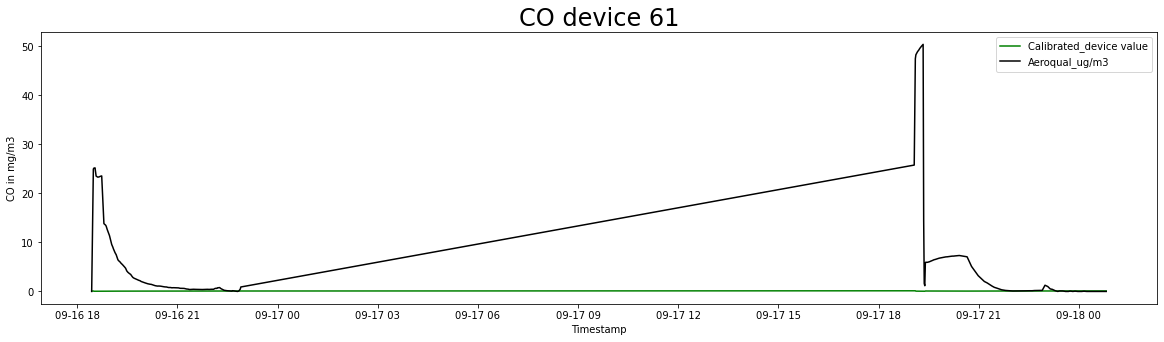

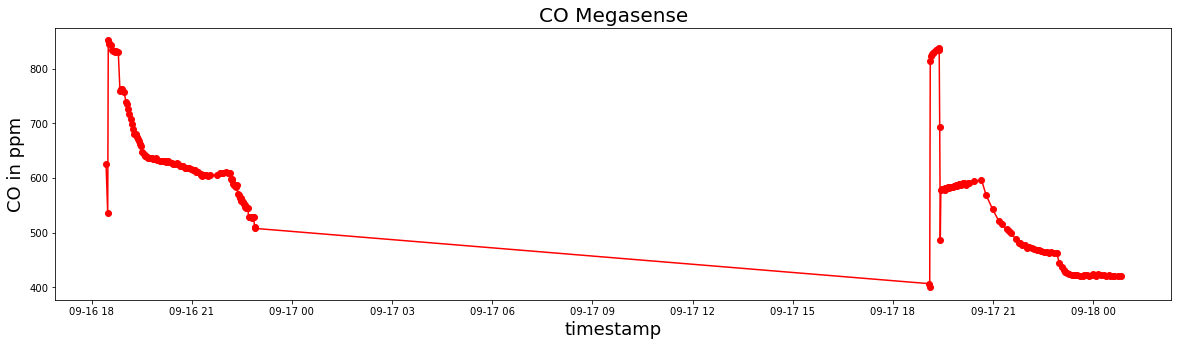

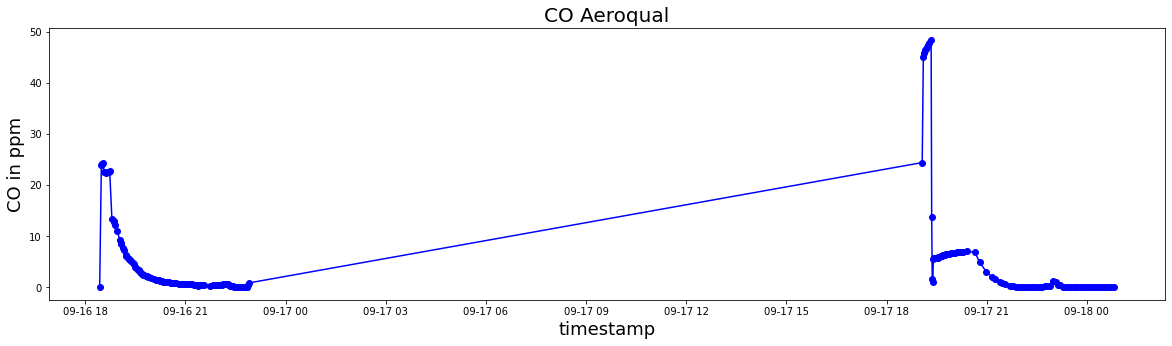

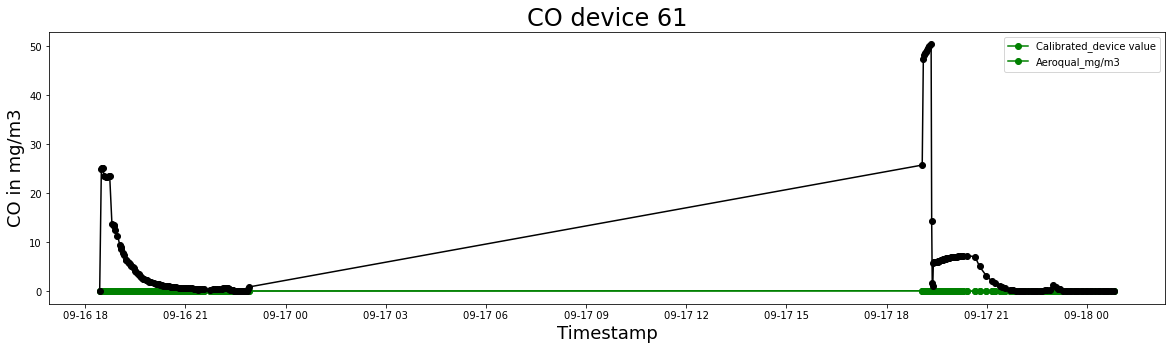

In [141]:
import matplotlib.pyplot as plt
x = O2['Date Time']
y1 = O2[' CO(ppm)']
y2 = O2['data.co_ppm']
y3 = O2['co-mg']
y4 = O2['Aero_mg/m3']

fig = plt.figure(figsize = (20,5))
#plt.plot(x, y1,'-b')
#plt.plot(x, y2, '-r')
plt.plot(x, y3, '-g')
plt.plot(x, y4, '-k')
plt.xlabel('Timestamp')
plt.ylabel('CO in mg/m3')
plt.title('CO device 61', fontsize = 24)
plt.legend(['Calibrated_device value', 'Aeroqual_ug/m3'])
plt.show()
fig= plt.figure(figsize=(20,5))
# plotting points as a scatter plot
plt.plot(x, y2, '-or')
plt.xlabel('timestamp', fontsize=18)
plt.ylabel('CO in ppm', fontsize=18)
#plt.legend(["Megasense", "Aeroqual"])
plt.title('CO Megasense', fontsize=20)
plt.show()

fig= plt.figure(figsize=(20,5))
plt.plot(x, y1, '-ob')

plt.xlabel('timestamp', fontsize=18)
plt.ylabel('CO in ppm', fontsize=18)
#plt.legend(["Aeroqual"])
plt.title('CO Aeroqual', fontsize=20)

fig= plt.figure(figsize=(20,5))
plt.plot(x, y3, '-og')

plt.xlabel('timestamp', fontsize=18)
plt.ylabel('CO in ppm', fontsize=18)
#plt.legend(["Aeroqual"])
plt.title('CO Calibrated value', fontsize=20)

#plt.plot(x, y1,'-b')
#plt.plot(x, y2, '-r')
plt.plot(x, y3, '-og')
plt.plot(x, y4, '-ok')
plt.xlabel('Timestamp')
plt.ylabel('CO in mg/m3')
plt.title('CO device 61', fontsize = 24)
plt.legend(['Calibrated_device value', 'Aeroqual_mg/m3'])
plt.show()

max correlation is at lag -71
max correlation is  0.19
Pearsons correlation: -0.413
MSE CO:  136.61643226227898
MAE CO:  5.360981459879156
RMSE CO:  11.68830322426138


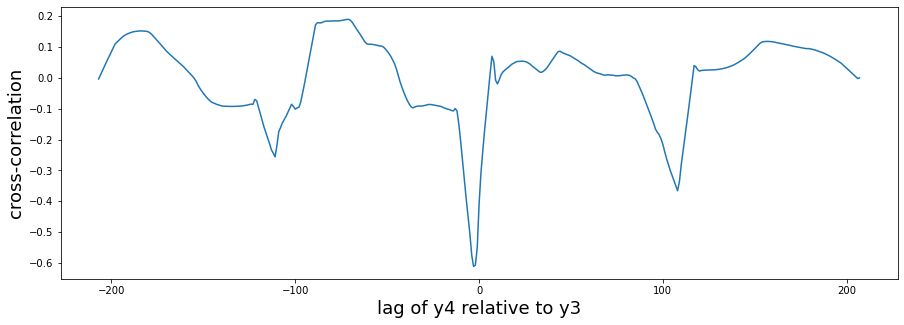

In [142]:
import numpy as np
from scipy.stats import pearsonr
from sklearn.metrics import r2_score
from sklearn import linear_model
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
npts = len(O2)
lags = np.arange(-npts + 1, npts)
ccov = np.correlate(y4 - y4.mean(), y3 - y3.mean(), mode='full')
ccor = ccov / (npts * y4.std() * y3.std())
fig= plt.figure(figsize=(15,5))
plt.plot(lags, ccor)
plt.ylabel('cross-correlation', fontsize = 18)
plt.xlabel('lag of y4 relative to y3', fontsize =18)

maxlag = lags[np.argmax(ccor)]
print("max correlation is at lag %d" % maxlag)
print("max correlation is ", round(max(ccor),3))
corr, _ = pearsonr(y4, y3) 
print('Pearsons correlation: %.3f' % corr) 
MSE = mean_squared_error(y4, y3)
MAE = mean_absolute_error(y4, y3)
print("MSE CO: ", MSE)
print("MAE CO: ", MAE)
print("RMSE CO: ", np.sqrt(mean_squared_error(y4, y3)))

In [27]:
O2 = O2[O2[' CO(ppm)']<25]

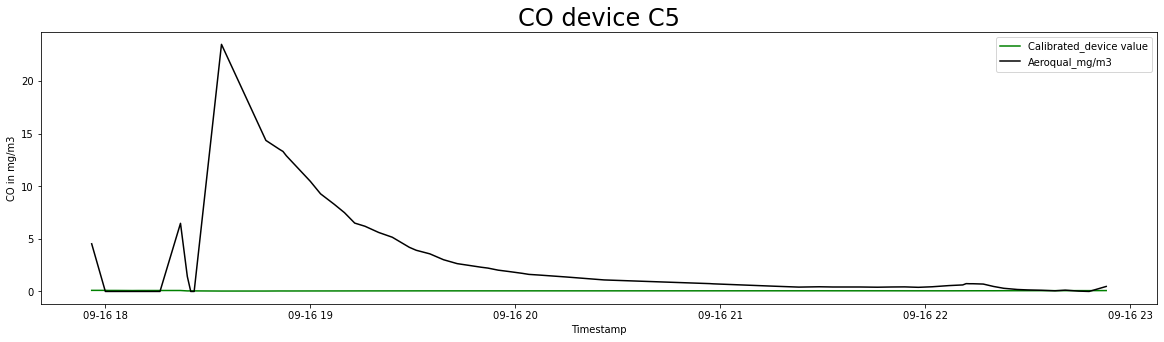

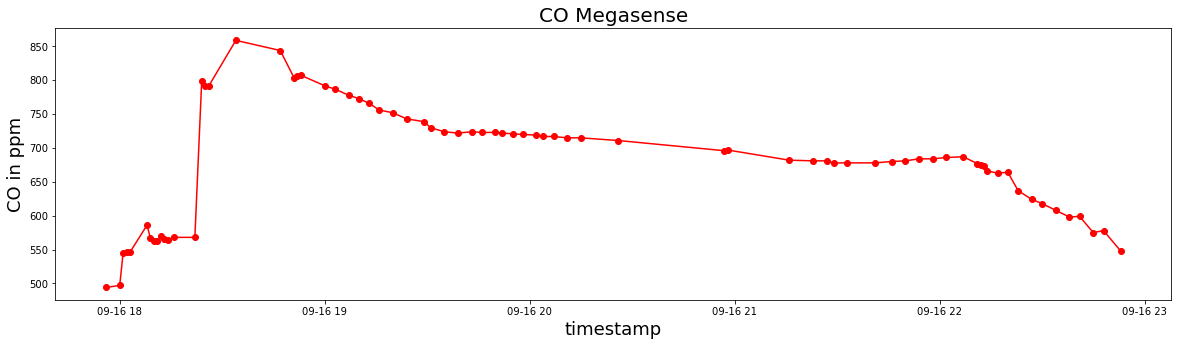

Text(0.5, 1.0, 'CO Aeroqual')

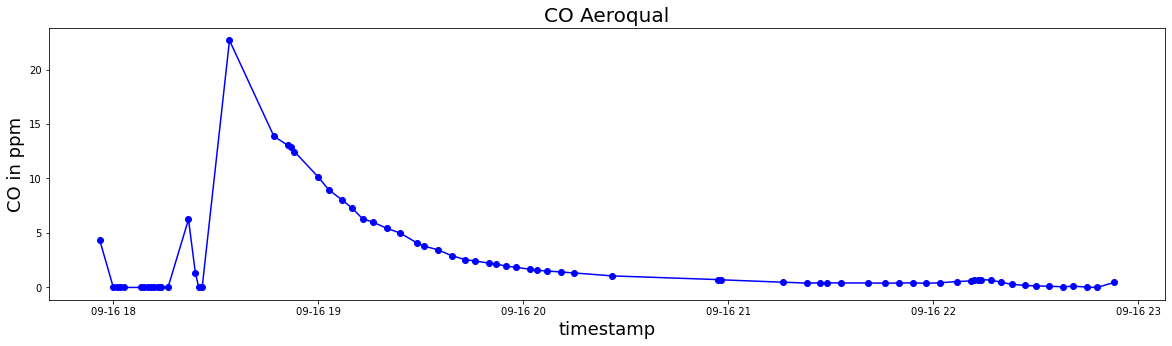

In [131]:
x = O3['Date Time']
y1 = O3[' CO(ppm)']
y2 = O3['data.co_ppm']
y3 = O3['co-mg']
y4 = O3['Aero_mg/m3']
fig = plt.figure(figsize = (20,5))
#plt.plot(x, y1,'-b')
#plt.plot(x, y2, '-r')
plt.plot(x, y3,'-g')
plt.plot(x, y4, '-k')
plt.xlabel('Timestamp')
plt.ylabel('CO in mg/m3')
plt.title('CO device C5', fontsize = 24)
plt.legend(['Calibrated_device value', 'Aeroqual_mg/m3'])
plt.show()
fig= plt.figure(figsize=(20,5))
# plotting points as a scatter plot
plt.plot(x, y2, '-or')
plt.xlabel('timestamp', fontsize=18)
plt.ylabel('CO in ppm', fontsize=18)
#plt.legend(["Megasense", "Aeroqual"])
plt.title('CO Megasense', fontsize=20)
plt.show()

fig= plt.figure(figsize=(20,5))
plt.plot(x, y1, '-ob')

plt.xlabel('timestamp', fontsize=18)
plt.ylabel('CO in ppm', fontsize=18)
#plt.legend(["Aeroqual"])
plt.title('CO Aeroqual', fontsize=20)

max correlation is at lag -3
max correlation is  0.629
Pearsons correlation: 0.632
MSE CO:  464045.10132770665
MAE CO:  676.2096
RMSE CO:  681.2085593470671


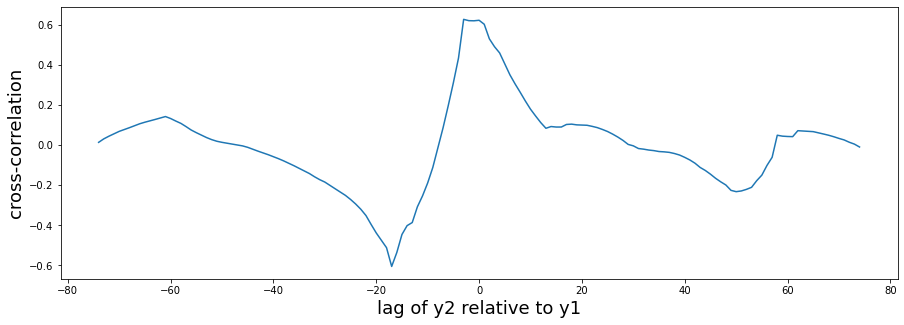

In [25]:
npts = len(O3)
lags = np.arange(-npts + 1, npts)
ccov = np.correlate(y2 - y2.mean(), y1 - y1.mean(), mode='full')
ccor = ccov / (npts * y2.std() * y1.std())
fig= plt.figure(figsize=(15,5))
plt.plot(lags, ccor)
plt.ylabel('cross-correlation', fontsize = 18)
plt.xlabel('lag of y2 relative to y1', fontsize =18)

maxlag = lags[np.argmax(ccor)]
print("max correlation is at lag %d" % maxlag)
print("max correlation is ", round(max(ccor),3))
corr, _ = pearsonr(y2, y1) 
print('Pearsons correlation: %.3f' % corr) 
MSE = mean_squared_error(y2, y1)
MAE = mean_absolute_error(y2, y1)
print("MSE CO: ", MSE)
print("MAE CO: ", MAE)
print("RMSE CO: ", np.sqrt(mean_squared_error(y2, y1)))

# PPM TO MG/M3

In [99]:
def ppm_to_mg_per_m3(mol_wei, T, P, PPM):
    result = (P*0.75006 * mol_wei * PPM)/(62.4 * (273.2 + T))
    return result

    
        

In [100]:
O2['Aero_mg/m3'] = O2.apply(ppm_to_mg_per_m3(mol_wei = 28.01, T = O2['temp_c'], P = O2['press_hpa'], PPM = O2[' CO(ppm)'] ))

ValueError: no results

In [101]:
q = O2['press_hpa'] * 0.75006


In [106]:
r = q*28.01
s =r*O2[' CO(ppm)']/62.4
t = s/(273.2+O2['temp_c'])

32      0.000000
35     24.964978
36     25.167470
37     25.169192
38     25.217198
         ...    
631     0.000000
636     0.000000
639     0.000000
645     0.000000
650     0.000000
Length: 208, dtype: float64

In [108]:
O2['Aero_mg/m3'] = (O2['press_hpa'] * 0.75006*28.01*O2[' CO(ppm)'])/(62.4*(273.2+O2['temp_c']))

In [109]:
O2['Aero_mg/m3']

32      0.000000
35     24.964978
36     25.167470
37     25.169192
38     25.217198
         ...    
631     0.000000
636     0.000000
639     0.000000
645     0.000000
650     0.000000
Name: Aero_mg/m3, Length: 208, dtype: float64

In [122]:
O3['Aero_mg/m3'] = (O3['press_hpa'] * 0.75006*28.01*O3[' CO(ppm)'])/(62.4*(273.2+O3['temp_c']))
O3['Aero_mg/m3']

2      4.533391
6      0.000000
7      0.000000
8      0.000000
9      0.000000
         ...   
284    0.061982
287    0.123963
291    0.030990
294    0.000000
299    0.475081
Name: Aero_mg/m3, Length: 75, dtype: float64

In [4]:
File_conversion('device76_nov2.json', 'Device76_nov2.csv')

<ipython-input-2-1c2713b504e8>:3: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  df1 = json_normalize(data)


In [5]:
df = pd.read_csv('Device76_nov2.csv')


In [6]:
df.tail(25)

,Unnamed: 0,Date Time,data.temp_c,data.hum_prcnt,data.press_hpa,data.eq_db,data.onesmin_db,data.onesmax_db,data.co_ppm,data.no2_ppb,...,data.leds_on,data.code_version,data.gps_avg_snr,data.cell_strength_dbm,data.wifi_strength_dbm,data.wifi_strength_asl,data.location.lat,data.location.lon,data.location.acc,data.timestamp
11746,11746,2021-11-02 17:47:52,25.760000,64.488998,946.641418,67.300095,64.622871,69.872696,321,1692,...,1,1,22.963636,-3.0,-67,2,17.423157,78.338887,2.8,1635855472054
11747,11747,2021-11-02 17:48:23,25.639999,64.723000,945.927795,81.796097,70.214600,88.248299,321,1753,...,1,1,24.950000,-17.0,-67,2,17.425502,78.340318,3.1,1635855503654
11748,11748,2021-11-02 17:48:54,25.620001,64.767998,947.075989,84.226334,64.570709,94.799164,309,1696,...,1,1,24.480000,-23.0,-67,2,17.425502,78.340318,3.1,1635855534709
11749,11749,2021-11-02 17:49:26,25.760000,64.001999,947.041870,68.468979,66.006622,75.017433,316,1721,...,1,1,25.369999,-19.0,-67,2,17.425517,78.340345,1.6,1635855566053
11750,11750,2021-11-02 17:49:57,25.900000,63.437000,946.972900,68.891251,67.485252,69.937378,360,1814,...,1,1,24.500002,-29.0,-67,2,17.425617,78.340450,2.9,1635855597254
11751,11751,2021-11-02 17:50:28,26.010000,62.868000,946.725830,70.707550,67.127060,76.505821,413,1960,...,1,1,24.972729,-37.0,-67,2,17.427163,78.341390,3.0,1635855628259
11752,11752,2021-11-02 17:50:57,25.860001,63.240002,946.410828,77.288445,72.208618,82.966934,410,1857,...,1,1,23.333334,-47.0,-67,2,17.429193,78.342652,3.4,1635855657898
11753,11753,2021-11-02 17:51:29,25.690001,63.442001,944.506470,79.529488,70.920685,87.861038,405,1714,...,1,1,23.663635,-59.0,-67,2,17.431477,78.344112,2.9,1635855689492
11754,11754,2021-11-02 17:52:00,25.219999,64.460999,942.125916,85.598907,76.961563,89.974464,336,1632,...,1,1,23.183332,-41.0,-67,2,17.434673,78.346082,3.4,1635855720105
11755,11755,2021-11-02 17:52:31,25.160000,64.427002,941.038208,88.248878,85.223991,91.342377,373,1642,...,1,1,26.150000,-43.0,-67,2,17.438140,78.348032,3.6,1635855751114
